# Statistical Learning Assignment

### Student Name: Ramnath Natarajan
### Course Name: AIML
### Batch: April'2020-B (Group 5)

In [326]:
#Some notes related to Python commands, etc. are given as comments
#Task numbers (in line with Problem Statement PDF) are given as Markdown cell
#Inference or statements (if any) after running a cell are given as Markdown cell

### 1) Importing necessary libraries

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
from scipy.stats import ttest_1samp

### 2) Reading the data as a Pandas dataframe

In [4]:
insurance=pd.read_csv('C:\\Users\Aditya\.ipynb_checkpoints\insurance.csv')
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 3) Basic EDA of given data

### 3A) Shape of the data

In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.size

9366

Total number of rows: 1338
Total number of columns: 7
Total number of elements: 1338*7 = 9366

### 3B) Data type of each attribute

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The above info shows that there are 3 data types: integer, float, object

### 3C) Checking presence of missing or null values

Comparing outputs of sections 3A (shape function) & 3B (describe function)shows that number of rows (1338) = number of non-null objects for each of the attribute columns. Hence, there no null values. 

Other methods to check this is shown below

In [8]:
# This returns number of non-null records
insurance.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

The above output shows that number of records per attribute column is same as per number of rows. So, no null values are present in the data

In [9]:
# Returns True if null value is present
insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

'False' value in each of the attribute column indicates no null values present in data

### 3D) 5 point summary for numerical attributes

In [10]:
insurance.describe().round(decimals=2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


Out of the 4 attributes shown above, mean and standard deviation don't reflect the central tendency for "children", since the number of children has to be whole numbers. Hence, median and mode can be checked.

Median (Q2 or 50% IQR) of 'children' = 1 (as shown in above output)

In [11]:
# Direct method to get median of 'children'
insurance['children'].median()

1.0

In [12]:
# Direct method to get mode of 'children'
stats.mode(insurance['children'])

ModeResult(mode=array([0], dtype=int64), count=array([574]))

Mode of 'children' is 0 and it occurs 574 times out of 1338 entries

### 3E) Distribution of attributes: 'bmi' , 'age' & 'charges

#### 3E.1) Distribution of 'bmi'

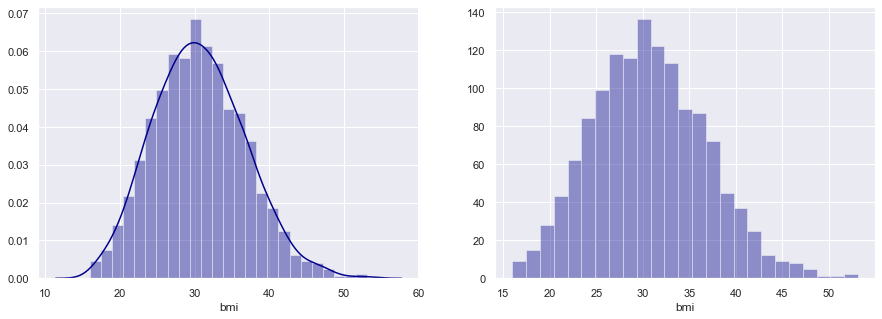

In [13]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(insurance['bmi'],color='darkblue',ax=ax[0]);
sns.distplot(insurance['bmi'],kde=False,color='darkblue',ax=ax[1]);

Distribution of 'bmi' shows a bell shape tendency

#### 3E.2) Distribution of 'age'

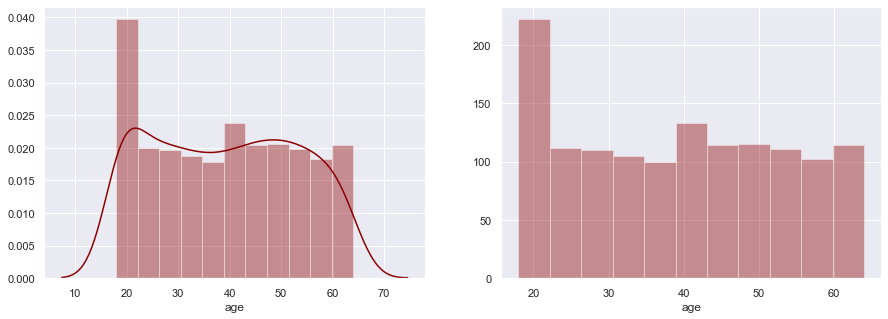

In [14]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(insurance['age'],color='darkred',ax=ax[0]);
sns.distplot(insurance['age'],kde=False,color='darkred',ax=ax[1]);

Distribution of 'age' shows bimodal normal distribution

#### 3E.3) Distribution of 'charges'

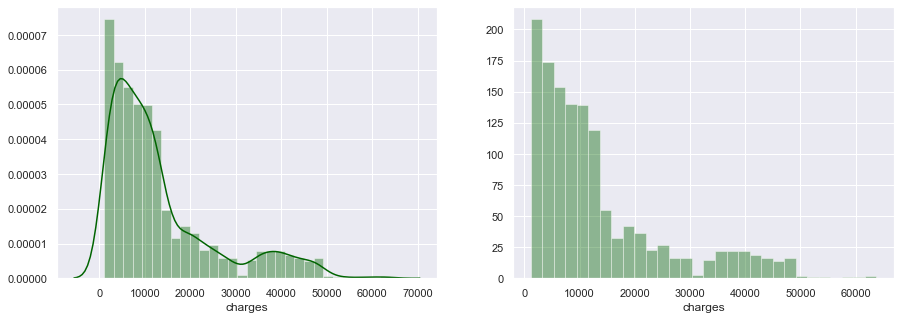

In [164]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(insurance['charges'],color='darkgreen',ax=ax[0]);
sns.distplot(insurance['charges'],kde=False,color='darkgreen',ax=ax[1]);

Distribution of 'charges' shows bell shaped tendency but it is asymmetric (right skew)

### 3F) Skewness of attributes: 'bmi' , 'age' & 'charges

In [24]:
#Direct skew() function is used to measure skewness of distribution

stats.skew(insurance['bmi'])

0.28372857291709386

In [26]:
stats.skew(insurance['age'])

0.055610083072599126

In [27]:
stats.skew(insurance['charges'])

1.5141797118745743

### 3G) Checking presence of outliers in attributes: 'bmi' , 'age' & 'charges

* Outliers can be visualized by using Box plots
* Values > 1.5 IQR on either side of median (Q2) are considered as Outliers

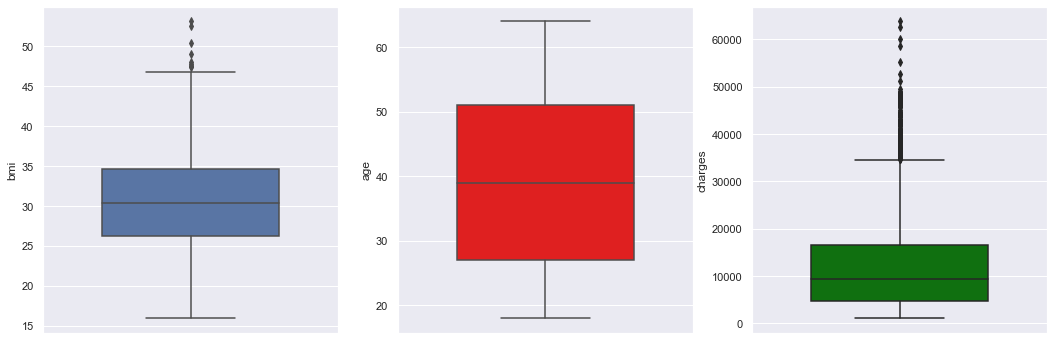

In [68]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(18)

sns.boxplot(y=insurance['bmi'], width=0.6,ax=ax[0]);
sns.boxplot(y=insurance['age'], width=0.6, color='red',ax=ax[1]);
sns.boxplot(y=insurance['charges'], width=0.6, color='green',ax=ax[2]);

* For 'bmi', whisker on upper side represents 1.5 times IQR. Data points beyond this line are outliers
* For 'age', no outliers present
* For 'charges', whisker on upper side represents 1.5 times IQR. Data points outside this line are outliers

### 3H) Distribution of categorical columns & 'children' 

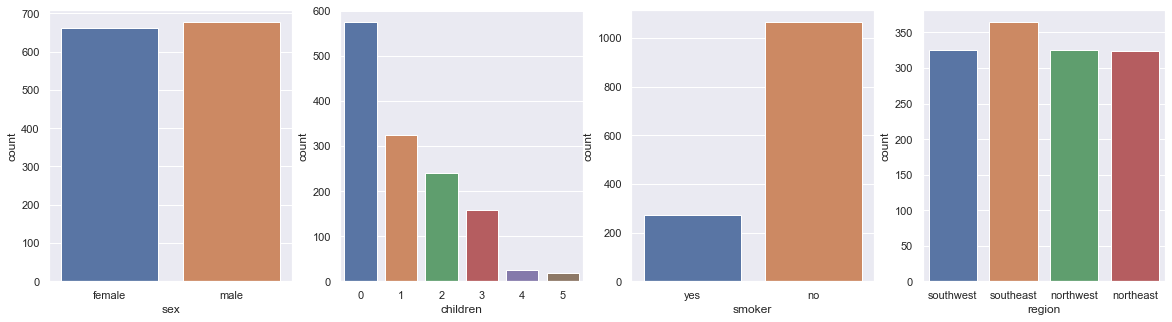

In [82]:
fig, ax = plt.subplots(1, 4)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.countplot(insurance['sex'],ax=ax[0]);
sns.countplot(insurance['children'],ax=ax[1]);
sns.countplot(insurance['smoker'],ax=ax[2]);
sns.countplot(insurance['region'],ax=ax[3]);

### 3I) Pairplot of all columns in dataframe

We have 4 numerical variables and 3 categorical variables. Pairplot function takes numerical values for generating plots, however, any one categorical variable can be shown by means of 'hue' or color legend

Hence, we generate 3 pairplots, one for each categorical variable distribution amongst numerical variables.

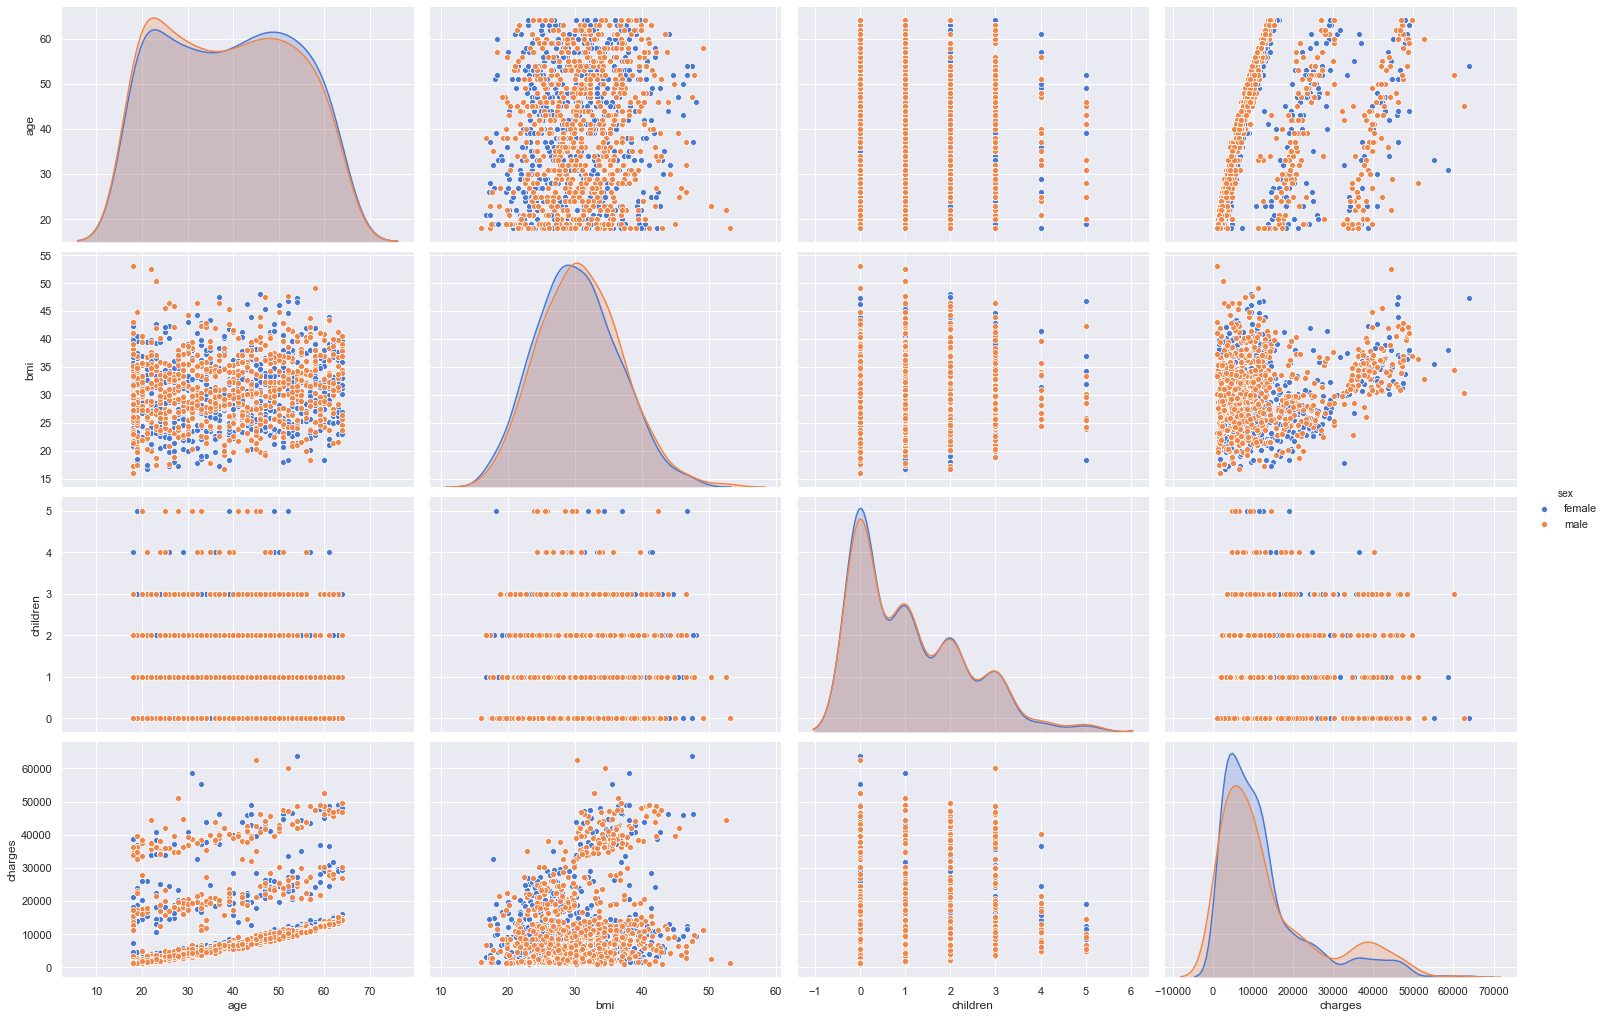

In [135]:
# Pairplot with categorical variable 'sex' set as color legend (hue)
# Since 'hue' is added, diagonals are shown as kde plots instead of stacked histograms
sns.pairplot(insurance,hue='sex',height=3.5,aspect=1.5,palette='muted');

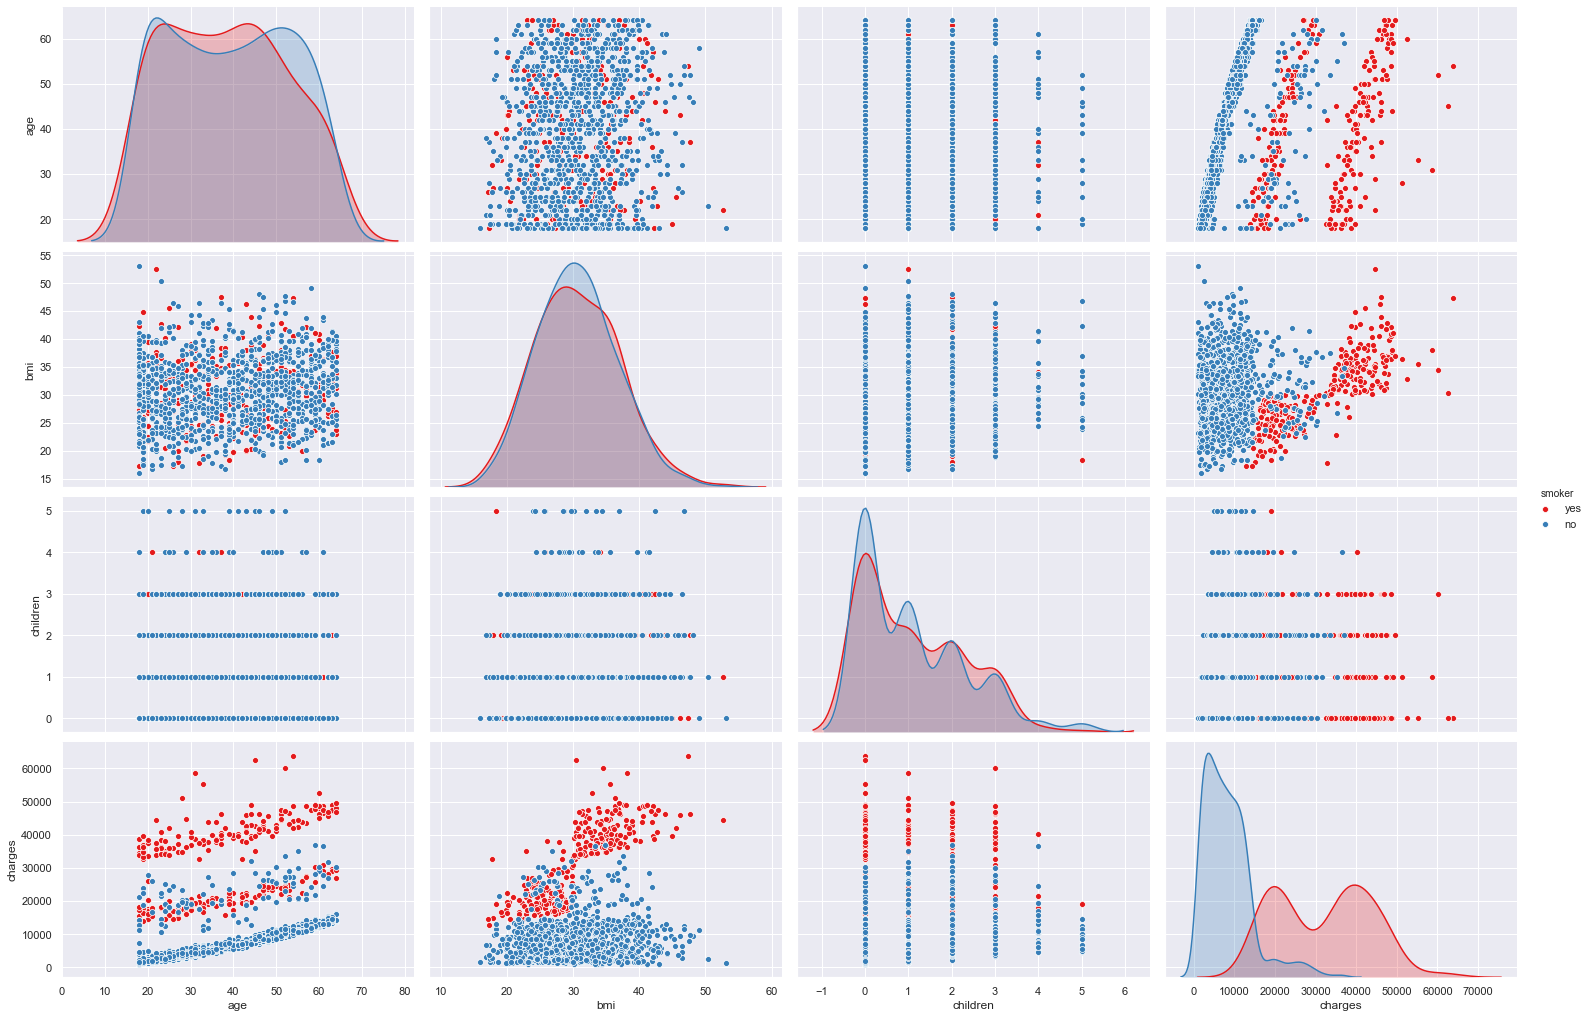

In [136]:
# Pairplot with categorical variable 'smoker' set as color legend (hue)
# Since 'hue' is added, diagonals are shown as kde plots instead of stacked histograms
sns.pairplot(insurance,hue='smoker',height=3.5,aspect=1.5,palette="Set1");

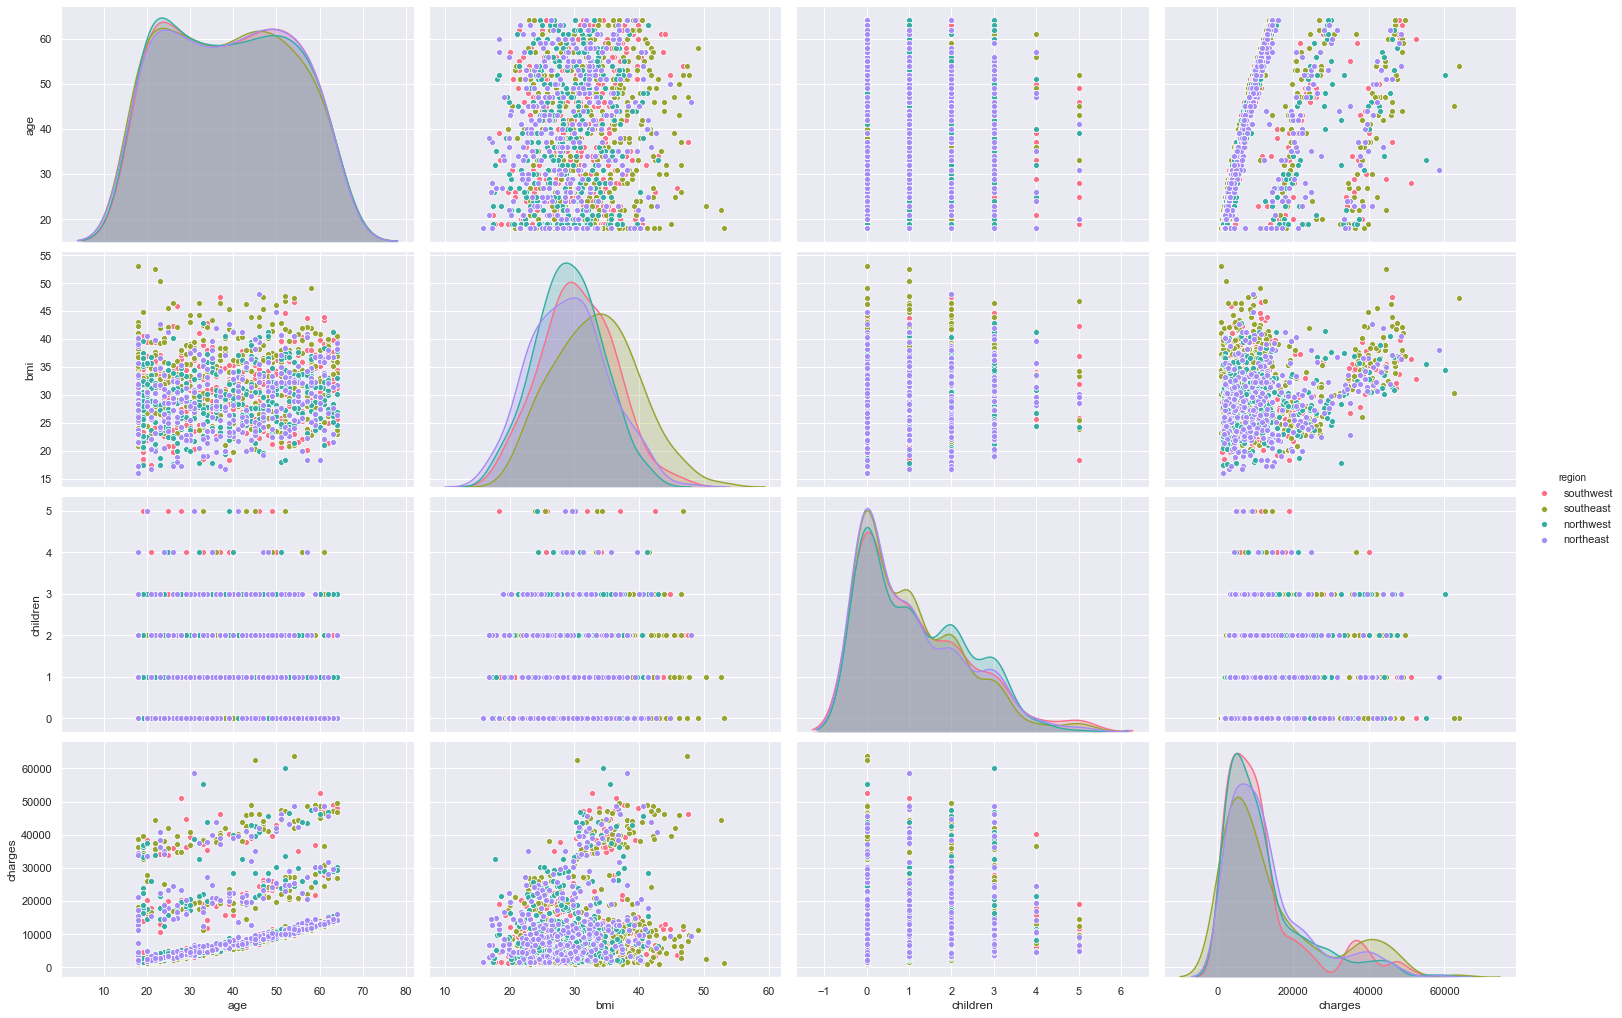

In [148]:
# Pairplot with categorical variable 'region' set as color legend (hue)
# Since 'hue' is added, diagonals are shown as kde plots instead of stacked histograms
sns.pairplot(insurance,hue='region',height=3.5,aspect=1.5,palette="husl");

### 4) Answers based on Statistical evidence

### 4A) Question: Do charges of people who smoke differ significantly from the people who don't?

Comparison of charges (numerical variable) to be done between smokers and non smokers (categorical variables)

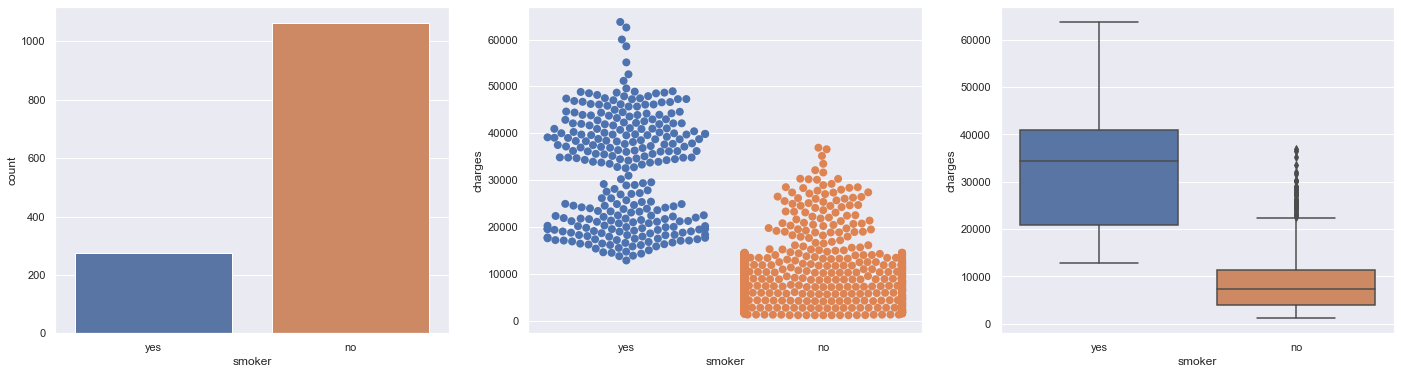

In [275]:
# For visualization, swarmplot, countplot and boxplot are used

fig,ax = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(24)

sns.countplot(insurance['smoker'],ax=ax[0]);
sns.swarmplot(insurance['smoker'], insurance['charges'],size=8,ax=ax[1]);
sns.boxplot(insurance['smoker'], insurance['charges'],ax=ax[2]);

* From above plots, it appears that central value of charges of smokers is greater than non-smokers. 
* Next step, we calculate the mean and difference between mean values

In [278]:
#'sm' refers to sub dataframe with data of smokers only
# 'smm' refers to mean of charges for smokers

sm=insurance[insurance["smoker"]=="yes"]
smm=np.around(sm['charges'].mean(),1)
print("Total number of smokers is",len(sm),"\nMean of charges for smokers is",smm,"\nExtract of data pertaining to smokers is shown below")
sm.head(5).round()

Total number of smokers is 274 
Mean of charges for smokers is 32050.2 
Extract of data pertaining to smokers is shown below


,age,sex,bmi,children,smoker,region,charges
0,19,female,28.0,0,yes,southwest,16885.0
11,62,female,26.0,0,yes,southeast,27809.0
14,27,male,42.0,0,yes,southeast,39612.0
19,30,male,35.0,0,yes,southwest,36837.0
23,34,female,32.0,1,yes,northeast,37702.0


In [279]:
#'nsm' refers to sub-dataframe with data of smokers only
# 'nsmm' refers to mean of charges for smokers

nsm=insurance[insurance["smoker"]=="no"]
nsmm=np.around(nsm['charges'].mean(),1)
print("Total number of smokers is",len(nsm),"\nMean of charges for smokers is",nsmm,"\nExtract of data pertaining to smokers is shown below")
nsm.head(5).round()

Total number of smokers is 1064 
Mean of charges for smokers is 8434.3 
Extract of data pertaining to smokers is shown below


,age,sex,bmi,children,smoker,region,charges
1,18,male,34.0,1,no,southeast,1726.0
2,28,male,33.0,3,no,southeast,4449.0
3,33,male,23.0,0,no,northwest,21984.0
4,32,male,29.0,0,no,northwest,3867.0
5,31,female,26.0,0,no,southeast,3757.0


In [284]:
#Difference between mean values of charges (smokers vs non-smokers)

diff1=smm-nsmm
diff1.round(2)

23615.9

To check if the above difference is significant, one sample tailed test has to be carried out

In [323]:
#null hypothesis -> Mean value is 'smm' which is 32050.2

t_statistic, p_value = ttest_1samp(nsm['charges'], smm)
print(t_statistic,p_value)

-128.52125805452695 0.0


### 4A) Conclusion:

P value is 0 which is less than 0.05, which means we can reject null hypothesis. So, the difference in mean 'charges' is not significant

### 4B) Question: Does bmi of males differ significantly from that of females?

Comparison of 'bmi' (numerical variable) to be done between males and females (categorical variables)

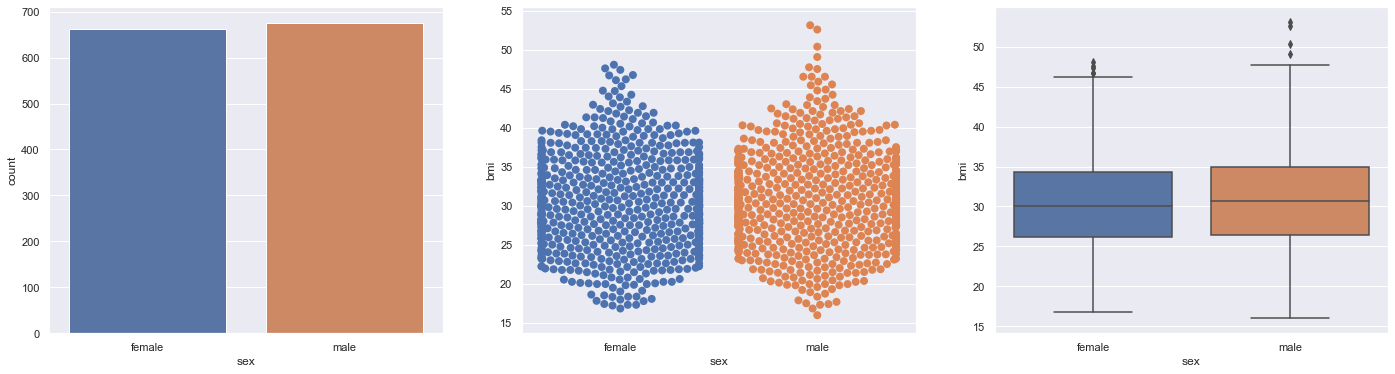

In [277]:
# For visualization, swarmplot, countplot and boxplot are used

fig,ax = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(24)

sns.countplot(insurance['sex'],ax=ax[0]);
sns.swarmplot(insurance['sex'], insurance['bmi'],size=8,ax=ax[1]);
sns.boxplot(insurance['sex'], insurance['bmi'],ax=ax[2]);

* From above plots, it appears that there is a minor difference central values of 'bmi' (male vs female) 
* Next step, we calculate the mean and difference between mean values (male vs female)

In [280]:
#'male' refers to sub-dataframe with data of males only
# 'male_m' refers to mean of bmi for males

male=insurance[insurance["sex"]=="male"]
male_m=np.around(male['bmi'].mean(),1)
print("Total number of males is",len(male),"\nMean of BMI for males is",male_m,"\nExtract of data pertaining to males is shown below")
male.head(5).round()

Total number of males is 676 
Mean of BMI for males is 30.9 
Extract of data pertaining to males is shown below


,age,sex,bmi,children,smoker,region,charges
1,18,male,34.0,1,no,southeast,1726.0
2,28,male,33.0,3,no,southeast,4449.0
3,33,male,23.0,0,no,northwest,21984.0
4,32,male,29.0,0,no,northwest,3867.0
8,37,male,30.0,2,no,northeast,6406.0


In [300]:
#'female' refers to sub-dataframe with data of females only
# 'female_m' refers to mean of bmi for females

female=insurance[insurance["sex"]=="female"]
female_m=np.around(female['bmi'].mean(),1)
print("Total number of females is",len(female),"\nMean of BMI for females is",female_m,"\nExtract of data pertaining to females is shown below")
female.head(5).round()

Total number of females is 662 
Mean of BMI for females is 30.4 
Extract of data pertaining to females is shown below


,age,sex,bmi,children,smoker,region,charges
0,19,female,28.0,0,yes,southwest,16885.0
5,31,female,26.0,0,no,southeast,3757.0
6,46,female,33.0,1,no,southeast,8241.0
7,37,female,28.0,3,no,northwest,7282.0
9,60,female,26.0,0,no,northwest,28923.0


In [283]:
#Difference between mean values of bmi (male vs female)

diff2=male_m-female_m
diff2.round(2)

0.5

To check if the above difference is significant, one tail test has to be carried out

In [325]:
#null hypothesis -> Mean value is 'male_m' which is 30.9

t_stat_2, p2 = ttest_1samp(female['bmi'], male_m)
print(t_stat_2,p2)

-2.2224820923522643 0.02658836147370917


### 4B) Conclusion:

P value is 0.02 which is less than 0.05, which means we can reject null hypothesis. So, the difference in mean BMI is not significant

### 4C) Question: Is the proportion of smokers significantly different in different genders?

Comparison of 'smokers' count (categorical variable) to be done between males and females (categorical variables)

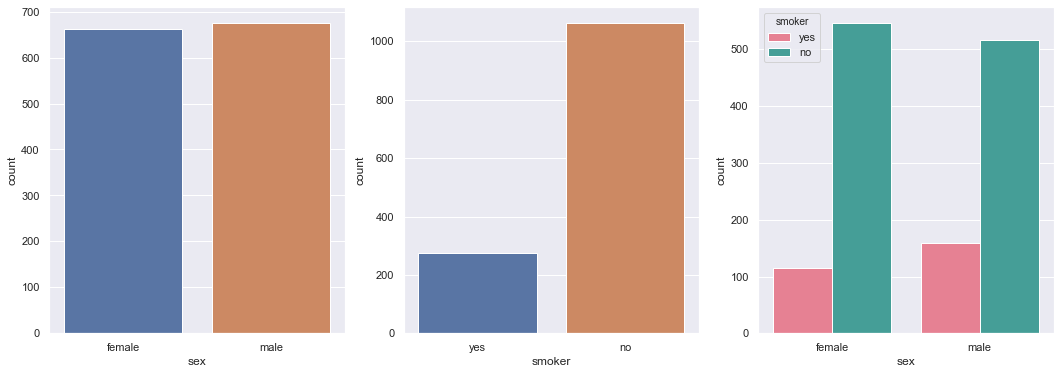

In [285]:
# Countplot is used for visualization of this scenario

fig,ax = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(18)

sns.countplot(insurance['sex'],ax=ax[0]);
sns.countplot(insurance['smoker'],ax=ax[1]);
sns.countplot(insurance['sex'],hue=insurance['smoker'],palette='husl',ax=ax[2]);

* From above plots, it appears that there is a minor difference number of male smokers vs female smokers 
* Next step, we calculate this difference

In [295]:
# Crosstab is created to get propotion of smokers(count) in males and females

smoke_count=pd.crosstab(insurance['sex'],insurance['smoker'])
smoke_count

smoker,no,yes
sex,,
female,547,115
male,517,159


In [299]:
smk_m=male[male["smoker"]=="yes"]
smk_f=female[female["smoker"]=="yes"]
diff3=len(smk_m)-len(smk_f)

print("Total number of male smokers is",len(smk_m),"\nTotal number of female smokers is",len(smk_f),"\nDifference is",diff3)

Total number of male smokers is 159 
Total number of female smokers is 115 
Difference is 44


### 4C) Conclusion:

The difference is significant

### 4D) Question: Is the distribution of bmi across women with no children, one child and two children, the same?

Comparison of 'bmi' (numerical variable) to be done for females based on number of chidren they have (numerical variable)

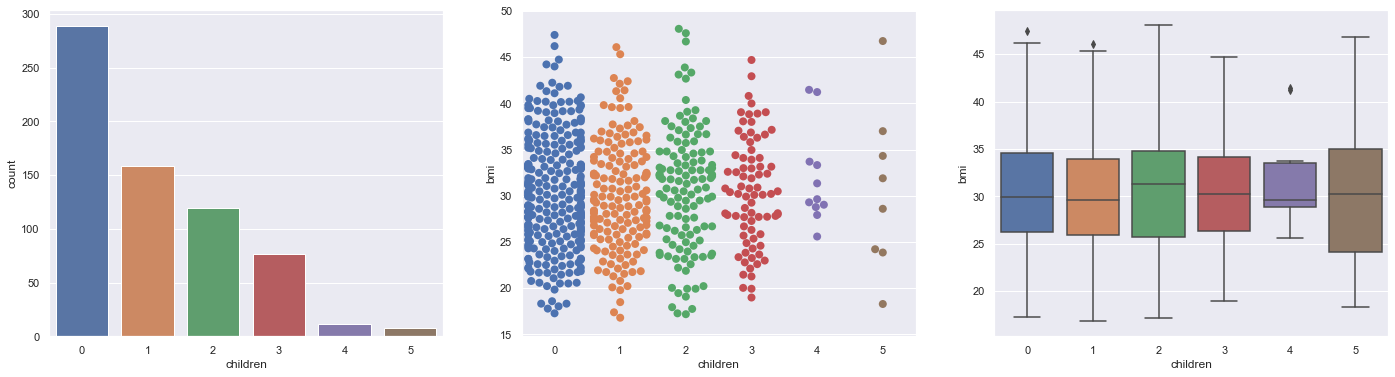

In [301]:
# For visualization, swarmplot, countplot and boxplot are used

fig,ax = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(24)

sns.countplot(female['children'],ax=ax[0]);
sns.swarmplot(female['children'], female['bmi'],size=8,ax=ax[1]);
sns.boxplot(female['children'], female['bmi'],ax=ax[2]);

* From above plots, it appears that central values of 'bmi' are close to each other. Further analysis to be done.
* Since both are numerical variables, we use 5-point summary (mean, mode, median, Q1 and Q3) for conclusion

In [304]:
# Unique values under 'children' column are obtained (eventhough it is visible from countplot)

female.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [314]:
# Women with zero children

b0=female[female["children"]==0]
m0=stats.mode(b0['bmi'])[0]
print("Mode of bmi for women having zero children is",m0,"\nThe other summary points are given below")
b0.describe().round()

Mode of bmi for women having zero children is [25.08] 
The other summary points are given below


,age,bmi,children,charges
count,289.0,289.0,289.0,289.0
mean,38.0,30.0,0.0,11906.0
std,16.0,6.0,0.0,11472.0
min,18.0,17.0,0.0,1608.0
25%,22.0,26.0,0.0,3172.0
50%,36.0,30.0,0.0,9542.0
75%,56.0,35.0,0.0,14133.0
max,64.0,47.0,0.0,63770.0


In [315]:
# Women with one child

b1=female[female["children"]==1]
m1=stats.mode(b1['bmi'])[0]
print("Mode of bmi for women having one child is",m1,"\nThe other summary points are given below")
b1.describe().round()

Mode of bmi for women having one child is [32.395] 
The other summary points are given below


,age,bmi,children,charges
count,158.0,158.0,158.0,158.0
mean,40.0,30.0,1.0,12161.0
std,11.0,6.0,0.0,11072.0
min,18.0,17.0,1.0,2201.0
25%,30.0,26.0,1.0,5046.0
50%,41.0,30.0,1.0,8233.0
75%,48.0,34.0,1.0,14287.0
max,64.0,46.0,1.0,58571.0


In [316]:
# Women with two children

b2=female[female["children"]==2]
m2=stats.mode(b2['bmi'])[0]
print("Mode of bmi for women having two children is",m2,"\nThe other summary points are given below")
b2.describe().round()

Mode of bmi for women having two children is [32.3] 
The other summary points are given below


,age,bmi,children,charges
count,119.0,119.0,119.0,119.0
mean,41.0,31.0,2.0,13941.0
std,12.0,7.0,0.0,11419.0
min,18.0,17.0,2.0,2801.0
25%,31.0,26.0,2.0,6358.0
50%,42.0,31.0,2.0,10107.0
75%,50.0,35.0,2.0,15650.0
max,64.0,48.0,2.0,47305.0


In [317]:
# Women with three children

b3=female[female["children"]==3]
m3=stats.mode(b3['bmi'])[0]
print("Mode of bmi for women having one child is",m3,"\nThe other summary points are given below")
b3.describe().round()

Mode of bmi for women having one child is [27.83] 
The other summary points are given below


,age,bmi,children,charges
count,77.0,77.0,77.0,77.0
mean,42.0,30.0,3.0,13866.0
std,12.0,6.0,0.0,10083.0
min,18.0,19.0,3.0,4235.0
25%,33.0,26.0,3.0,7151.0
50%,41.0,30.0,3.0,11086.0
75%,53.0,34.0,3.0,16420.0
max,64.0,45.0,3.0,46661.0


In [319]:
# Women with four children

b4=female[female["children"]==4]
m4=stats.mode(b4['bmi'])[0]
print("Mode of bmi for women having one child is",m4,"\nThe other summary points are given below")
b4.describe().round()

Mode of bmi for women having one child is [25.6] 
The other summary points are given below


,age,bmi,children,charges
count,11.0,11.0,11.0,11.0
mean,42.0,32.0,4.0,13938.0
std,13.0,5.0,0.0,9300.0
min,18.0,26.0,4.0,4561.0
25%,32.0,29.0,4.0,9111.0
50%,48.0,30.0,4.0,11034.0
75%,50.0,34.0,4.0,15112.0
max,61.0,41.0,4.0,36580.0


In [320]:
# Women with five children

b5=female[female["children"]==5]
m5=stats.mode(b5['bmi'])[0]
print("Mode of bmi for women having one child is",m5,"\nThe other summary points are given below")
b5.describe().round()

Mode of bmi for women having one child is [18.3] 
The other summary points are given below


,age,bmi,children,charges
count,8.0,8.0,8.0,8.0
mean,37.0,31.0,5.0,9854.0
std,12.0,9.0,0.0,4635.0
min,19.0,18.0,5.0,4688.0
25%,34.0,24.0,5.0,7644.0
50%,39.0,30.0,5.0,8781.0
75%,42.0,35.0,5.0,11813.0
max,52.0,47.0,5.0,19023.0


### 4D) Conclusion (based on different central tendency measures):

The following can cited based on above computations

* Based on mode, BMI distribution is different for women of all categories under 'children'
* Based on median or Q2, except for women with two children, others have BMI distributed in the same way (median =30). The former has a median value of 31
* Based on mean, women with 0,1,3 child/children have same BMI distribution (Mean = 30). Women with 2,5 children have same BMI distribution (Mean = 31). Women with four children have unique BMI distribution (Mean = 32)